In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
import keras.layers as layers
import keras.optimizers as optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings(action='ignore')

In [90]:
amazon = pd.read_csv('AMZN.csv')
amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,656.289978,657.719971,627.510010,636.989990,636.989990,9314500
1,2016-01-05,646.859985,646.909973,627.650024,633.789978,633.789978,5822600
2,2016-01-06,622.000000,639.789978,620.309998,632.650024,632.650024,5329200
3,2016-01-07,621.799988,630.000000,605.210022,607.940002,607.940002,7074900
4,2016-01-08,619.659973,624.140015,606.000000,607.049988,607.049988,5512900


In [91]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1302 non-null   object 
 1   Open       1302 non-null   float64
 2   High       1302 non-null   float64
 3   Low        1302 non-null   float64
 4   Close      1302 non-null   float64
 5   Adj Close  1302 non-null   float64
 6   Volume     1302 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 71.3+ KB


In [92]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
scaled_set = sc.fit_transform(amazon.iloc[:, 1:2])
scaled_set.shape

(1302, 1)

In [93]:
scaled_set

array([[0.05809076],
       [0.05501809],
       [0.04691771],
       ...,
       [0.84821714],
       [0.82567555],
       [0.82339467]])

In [94]:
X_train, X_test, y_train, y_test = [], [], [], []

In [95]:
#preprocessing training data
for i in range(50, 1100):
    X_train.append(scaled_set[i-50:i, 0])
    y_train.append(scaled_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [96]:
X_train.shape

(1050, 50, 1)

In [98]:
y_train.shape

(1050,)

In [100]:
X_train[0]

array([[0.05809076],
       [0.05501809],
       [0.04691771],
       [0.04685254],
       [0.04615524],
       [0.04381571],
       [0.04797669],
       [0.04655277],
       [0.03331389],
       [0.03070391],
       [0.03228424],
       [0.02813628],
       [0.03114054],
       [0.03607701],
       [0.03909429],
       [0.04087338],
       [0.04039765],
       [0.04247651],
       [0.03061918],
       [0.03262963],
       [0.02997403],
       [0.02459767],
       [0.01531122],
       [0.01670583],
       [0.0027566 ],
       [0.        ],
       [0.0044803 ],
       [0.00428806],
       [0.01065171],
       [0.01351258],
       [0.01652986],
       [0.02058657],
       [0.01391338],
       [0.02091568],
       [0.02526563],
       [0.0220724 ],
       [0.02525587],
       [0.02675473],
       [0.02476059],
       [0.02550675],
       [0.03380265],
       [0.03256772],
       [0.03358108],
       [0.03112749],
       [0.02602159],
       [0.02657226],
       [0.02891179],
       [0.028

In [99]:
y_train

array([0.03213761, 0.02981437, 0.02702192, ..., 0.61544353, 0.61355691,
       0.61600397])

In [101]:
#preprocessing test data
for i in range(1100, 1302):
    X_test.append(scaled_set[i-50:i, 0])
    y_test.append(scaled_set[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [102]:
X_test.shape

(202, 50, 1)

In [103]:
y_test.shape

(202,)

In [104]:
model = Sequential()
model.add(layers.LSTM(units = 32, input_shape = (50,1)))
model.add(layers.Dropout(0.2))# Adding the output layer
model.add(layers.Dense(units = 1, activation='relu' ))

# Compiling the RNN
optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer = optimizer, loss = 'mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [105]:
# Fitting the LSTM to the Training set
model.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0489
Epoch 2/25
1050/1050 [==============================] - 1s 896us/step - loss: 0.0057
Epoch 3/25
1050/1050 [==============================] - 1s 907us/step - loss: 0.0030
Epoch 4/25
1050/1050 [==============================] - 1s 845us/step - loss: 0.0022
Epoch 5/25
1050/1050 [==============================] - 1s 889us/step - loss: 0.0022
Epoch 6/25
1050/1050 [==============================] - 1s 881us/step - loss: 0.0020
Epoch 7/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0020
Epoch 8/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 9/25
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0016
Epoch 10/25
1050/1050 [==============================] - 1s 904us/step - loss: 0.0014
Epoch 11/25
1050/1050 [==============================] - 1s 876us/step - loss: 0.0016
Epoch 12/25
1050/1050 [==============================] - 1s 992us/step 

In [107]:
#predictions and loss calculation
y_pred = model.predict(X_test)
print('mse test error : ', mean_squared_error(y_test,y_pred))

mse test error :  0.0021024300119862733


In [108]:
print('R squared error : ', r2_score(y_test,y_pred))

R squared error :  0.6992876415393443


In [109]:
#scaling reverse transformation
y_pred = sc.inverse_transform(y_pred)
y_test = sc.inverse_transform(y_test.reshape(-1,1))

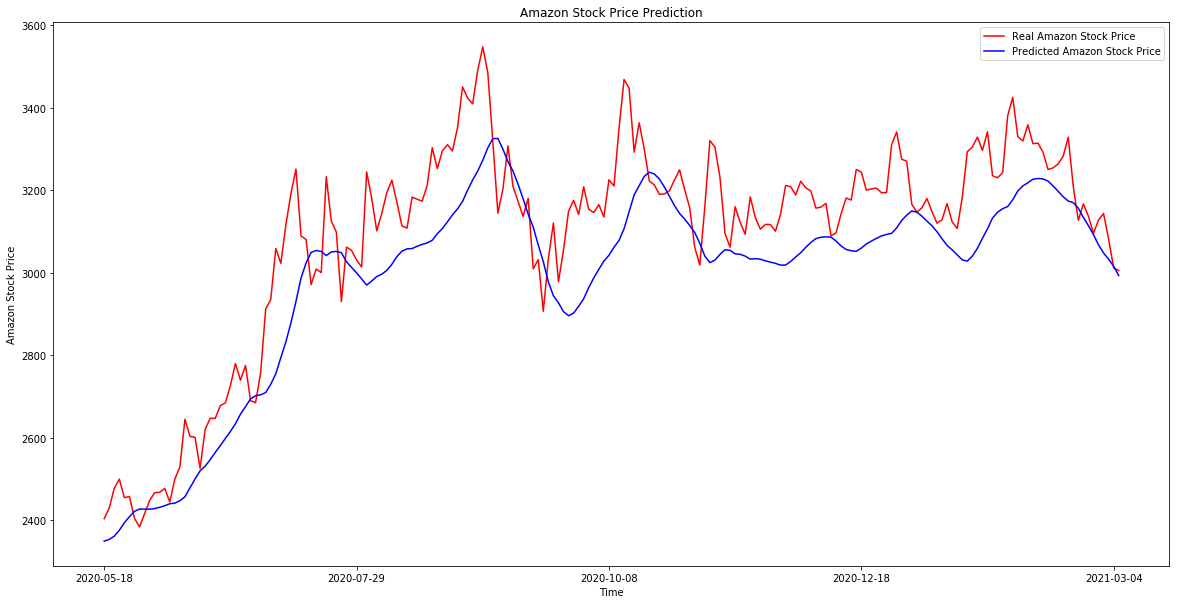

In [110]:
# Visualising the results
plt.figure(figsize = (20,10))
plt.plot(amazon.loc[1100:,'Date'] ,y_test , color = 'red', label = 'Real Amazon Stock Price')
plt.plot(amazon.loc[1100:,'Date'] ,y_pred , color = 'blue', label = 'Predicted Amazon Stock Price')
plt.xticks(np.arange(0,202,50))
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()